In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys import ecephys_session
# %matplotlib inline


#Note the following three lines are necessary to pull fs_utils
import sys
sys.path.append('../swdb_2019_tools')
import fs_utils

# fix slow autocomplete
%config Completer.use_jedi = False

import platform
platstring = platform.platform()

In [4]:
if 'Darwin' in platstring:
    # OS X 
    data_root = "/Volumes/Brain2019/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn1' in platstring):
    # then on AWS
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2019/"

manifest_path = os.path.join(data_root, "dynamic-brain-workshop/visual_coding_neuropixels/2019/manifest.json")

cache = EcephysProjectCache.fixed(manifest=manifest_path)
sessions = cache.get_sessions()

<b>Pull some sessions</b>

In [5]:
sessions = cache.get_sessions()

In [6]:
session = sessions.index[0]

In [7]:
session_data = cache.get_session_data(session)

<b>Pull some units</b>

In [8]:
session_units = session_data.units

In [9]:
len(session_units)

601

In [10]:
ca_units = session_units[session_units.structure_acronym == 'CA']
v1_units = session_units[session_units.structure_acronym == 'VISp']

In [11]:
len(ca_units), len(v1_units)

(115, 40)

In [12]:
unitspresplit = ca_units

<b>Test the function</b>

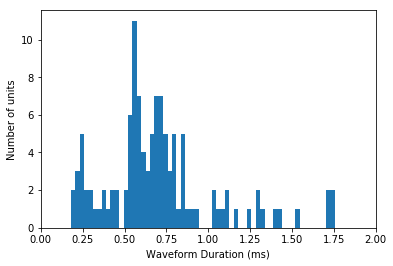

In [16]:
rsu_cells, fs_cells = fs_utils.fs_rsu_split(unitspresplit,0.4,return_hist=True)

In [17]:
len(unitspresplit),len(rsu_cells),len(fs_cells)

(115, 96, 19)